# **DAY 12 – Введение в анализ данных**  


## **Pandas, SQL, визуализация данных**

## **Task 4: Столбиковые диаграммы**

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pylab as plt
import sqlite3 as s

In [ ]:
from google.colab import drive   
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
conn = s.connect('/content/drive/MyDrive/School21/day12/data/checking-logs.sqlite') 

Что, если среднее количество коммитов отличается для рабочих дней и выходных?

Выполните необходимые шаги по созданию следующего графика:   



**1. Анализируйте только пользователей, а не администраторов.**  


**2. Используйте фильтр `status = 'ready'` для коммитов.**  


**3. Размеры шрифта и `figsize` такие же, как и раньше.**  


4. Для каждого часа подсчитайте среднее количество коммитов в рабочие дни и в выходные (если в течение часа в одну из дат не было коммитов, не используйте его для расчета среднего значения). Используйте эти значения для расчета средних в категории "рабочие дни" и в категории "выходные" и дальнешего построения графика, например:  
понедельник, 17–18: 5 коммитов;  
вторник, 17–18: 6 коммитов;  
среда, 17–18: 7 коммитов.  


**5. Выберите цветовую палитру по своему вкусу, не обязательно использовать те же самые цвета, что на графике выше.**

In [ ]:
sql = '''
      SELECT timestamp as commit_time
      FROM checker
      WHERE status='ready'
      AND uid LIKE "user_%" 
      '''
df = pd.read_sql(sql, conn, parse_dates='commit_time')
df.head()

,commit_time
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:45.549397
2,2020-04-17 05:34:24.422370
3,2020-04-17 05:43:27.773992
4,2020-04-17 05:46:32.275104


In [ ]:
df['hour'] = df['commit_time'].dt.hour
df['date'] = df['commit_time'].dt.date
df['weekday'] = df['commit_time'].dt.weekday.apply(lambda x: 'weekend' if x > 4 else 'working_day')
df.head()

,commit_time,hour,date,weekday
0,2020-04-17 05:19:02.744528,5,2020-04-17,working_day
1,2020-04-17 05:22:45.549397,5,2020-04-17,working_day
2,2020-04-17 05:34:24.422370,5,2020-04-17,working_day
3,2020-04-17 05:43:27.773992,5,2020-04-17,working_day
4,2020-04-17 05:46:32.275104,5,2020-04-17,working_day


In [ ]:
df = df.groupby(by = ['hour', 'date', 'weekday'], as_index=False) \
    .agg({'commit_time': 'count'}) \
    .rename(columns={'commit_time':'commits'})
df.head()

,hour,date,weekday,commits
0,0,2020-04-19,weekend,1
1,0,2020-04-23,working_day,2
2,0,2020-04-26,weekend,1
3,0,2020-05-10,weekend,1
4,0,2020-05-14,working_day,2


In [ ]:
df = df.groupby(['weekday', 'hour'], as_index=False).agg({'commits':'mean'})
df.head()

,weekday,hour,commits
0,weekend,0,1.0
1,weekend,1,3.0
2,weekend,3,1.0
3,weekend,5,1.0
4,weekend,7,2.5


In [ ]:
df = pd.pivot(df, index='hour', columns='weekday', values='commits')
df

weekday,weekend,working_day
hour,,
0,1.000000,2.000000
1,3.000000,NaN
3,1.000000,1.000000
5,1.000000,4.000000
6,NaN,1.000000
7,2.500000,2.666667
8,4.000000,2.333333
9,2.166667,3.400000
10,3.750000,6.800000


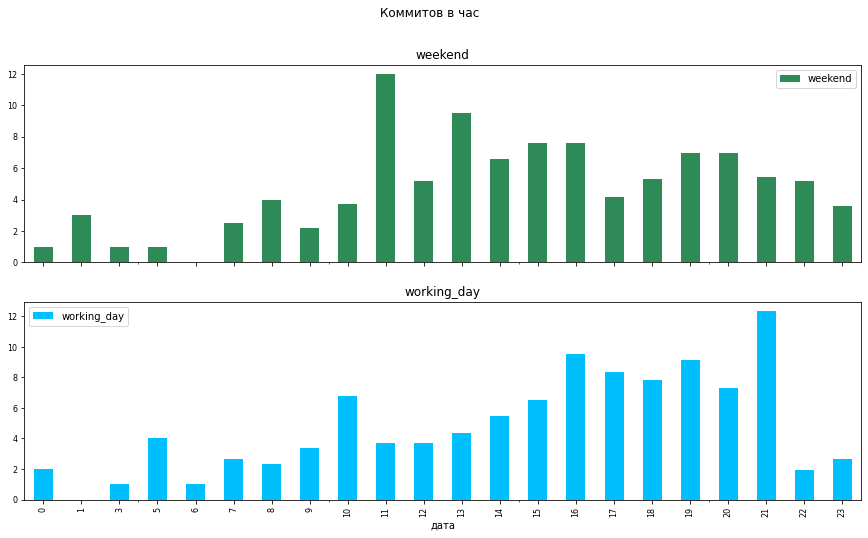

In [ ]:
df.plot(y=['weekend','working_day'],
        kind = 'bar',
        subplots = True,
        fontsize = 8,
        figsize = (15,8),
        title = 'Коммитов в час',
        xlabel = 'дата',
        rot = 90,
        color = ['seagreen', 'deepskyblue']
        )
plt.show()

6. В конце Jupyter Notebook создайте уценку-ячейку и задайте вопрос:

**«Отличается ли динамика в рабочие и выходные дни?».** 

В качестве ответа добавляются часы, когда количество коммитов является максимальным в рабочие дни, и часы, когда количество коммитов является максимальным в выходные дни.

In [ ]:
df.working_day.idxmax()

21

**Ответ: 21**

In [ ]:
df.weekend.idxmax()

11

**Ответ: 11**

In [51]:
conn.close()